In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model



In [43]:
%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [3]:
df = pd.read_csv("car_data.csv")

In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
mileage_p = df[['Price', 'Mileage']]
func_one = lambda x: 0 + .5 * x


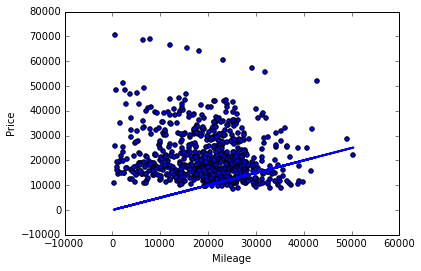

In [6]:
plt.scatter(mileage_p['Mileage'], mileage_p['Price'])
plt.ylabel('Price')
plt.xlabel('Mileage')
plt.plot(mileage_p.Mileage, func_one(mileage_p.Mileage), linewidth=2)

plt.show()

In [7]:
dfa = mileage_p.loc[:, ['Price', 'Mileage']]
dfa.dropna(inplace=True)
price = dfa[['Price']]
mile = dfa['Mileage']

In [8]:
regrp = linear_model.LinearRegression()
regrp.fit(price, mile)
print("Coeficient: {}".format(regrp.coef_))
print(regrp.score(price, mile))



Coeficient: [-0.11861458]
0.0204634473235


###This equation is not a good fit for the data


In [9]:
a = regrp.coef_[0]
func_two = lambda x: 0 + a * x


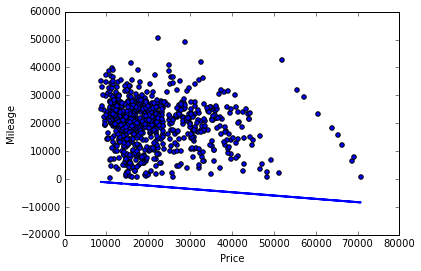

In [10]:
plt.scatter(mileage_p['Price'], mileage_p['Mileage'])
plt.xlabel('Price')
plt.ylabel('Mileage')
plt.plot(mileage_p.Price, func_two(mileage_p.Price), linewidth=2)

plt.show()

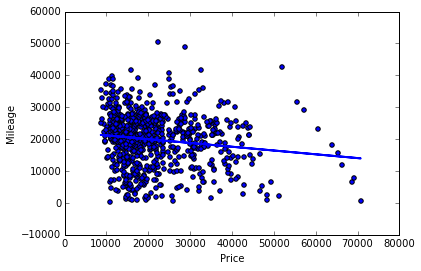

In [11]:
plt.scatter(price, mile)
plt.xlabel('Price')
plt.ylabel('Mileage')
plt.plot(price, regrp.predict(price), linewidth=2)

plt.show()

##Start of Part 2:


Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [15]:
set_one = df
set_one.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [17]:
set_one = set_one[['Price', 'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
set_one.head()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,6,3.1,4,1,1,1
1,17542.036083,9135,6,3.1,4,1,1,0
2,16218.847862,13196,6,3.1,4,1,1,0
3,16336.913140,16342,6,3.1,4,1,0,0
4,16339.170324,19832,6,3.1,4,1,0,1


In [18]:
input_data = set_one[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
predict_value = set_one['Price']

In [34]:
regrt = linear_model.LinearRegression()
regrt.fit(input_data, predict_value)
print('Coeficient: {}'.format(regrt.coef_))
print(regrt.score(input_data, predict_value))

Coeficient: [ -1.69747832e-01   3.79237893e+03  -7.87220732e+02  -1.54274585e+03
   6.28899715e+03  -1.99379528e+03   3.34936162e+03]
0.446264353673


###This data set only has a 44% accuracy at predicting car price.  Which sucks, but much better than just mileage

In [35]:
new_input = input_data[['Mileage', 'Doors', 'Sound']]

newreg = linear_model.LinearRegression()
newreg.fit(new_input, predict_value)
print('Coeficient: {}'.format(newreg.coef_))
print(newreg.score(new_input, predict_value))

Coeficient: [ -1.79922895e-01  -1.74267951e+03  -2.91228419e+03]
0.0592505439204


In [41]:
new_i = input_data[['Cylinder']]

newr = linear_model.LinearRegression()
newr.fit(new_i, predict_value)
print('Coeficient: {}'.format(newr.coef_))
print(newr.score(new_i, predict_value))

Coeficient: [ 4054.20250438]
0.323859037595


####The number of cylinders is the most import feature of the car to predict price, although it is still only accurate 32% of the time by its self. 

##Now time to try automating important variables


In [71]:
import itertools

dependant_variables = list(set_one.columns)
dependant_variables.remove('Price')



In [91]:
choices = []

def combos(list_of_series):
    combos = []
    x = len(list_of_series) + 1
    for num in range(2,x):
        combos.append(list(itertools.combinations(list_of_series, num)))
        x -= 1
    return combos

combos = combos(dependant_variables)
print(combos)

def regression_for(combo):
    combo = list(combo)
    df = set_one.loc[:, combo + ['Price']]
    df.dropna(inplace=True)
    input_data = df[combo]
    price = df['Price']
    regr = linear_model.LinearRegression()
    regr.fit(input_data, price)
    return regr, regr.score(input_data, price)


for combo in combos:
    regr, score = regression_for(combo)
    choices.append((combo, score))
                   
best = sorted(choices, key=lambda x: x[1])[-1]
print(best)
regr, score = regression_for(best[0])
print(regr.coef_, regr.intercept_)
print(choices)
combos(dependant_variables)

[[('Mileage', 'Cylinder'), ('Mileage', 'Liter'), ('Mileage', 'Doors'), ('Mileage', 'Cruise'), ('Mileage', 'Sound'), ('Mileage', 'Leather'), ('Cylinder', 'Liter'), ('Cylinder', 'Doors'), ('Cylinder', 'Cruise'), ('Cylinder', 'Sound'), ('Cylinder', 'Leather'), ('Liter', 'Doors'), ('Liter', 'Cruise'), ('Liter', 'Sound'), ('Liter', 'Leather'), ('Doors', 'Cruise'), ('Doors', 'Sound'), ('Doors', 'Leather'), ('Cruise', 'Sound'), ('Cruise', 'Leather'), ('Sound', 'Leather')], [('Mileage', 'Cylinder', 'Liter'), ('Mileage', 'Cylinder', 'Doors'), ('Mileage', 'Cylinder', 'Cruise'), ('Mileage', 'Cylinder', 'Sound'), ('Mileage', 'Cylinder', 'Leather'), ('Mileage', 'Liter', 'Doors'), ('Mileage', 'Liter', 'Cruise'), ('Mileage', 'Liter', 'Sound'), ('Mileage', 'Liter', 'Leather'), ('Mileage', 'Doors', 'Cruise'), ('Mileage', 'Doors', 'Sound'), ('Mileage', 'Doors', 'Leather'), ('Mileage', 'Cruise', 'Sound'), ('Mileage', 'Cruise', 'Leather'), ('Mileage', 'Sound', 'Leather'), ('Cylinder', 'Liter', 'Doors'), (

ValueError: Found array with 0 sample(s) (shape=(0, 21)) while a minimum of 1 is required.